In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log
from astropy.table import Table
import pyfits

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#t = Table.read('adjusted.fits', format='fits')

In [6]:
hdul = fits.open('adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band
dc_major = data.field('DC_maj')
lgz = data.field('LGZ_size')

In [7]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [10]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm
Lum_dG = array(cosmo.luminosity_distance([Flux_g])*3.08567758e24) ### Last number converts it into cm

In [11]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-26/(1+z))
    return P
Pw22 = (power(Lum_d22,Flux_22,z))
Pw_g  = (power(Lum_dG,Flux_g,z))


In [13]:
Pw = power(Lum_d,flux_tot,z)

#(1+z)**(-0.7)

In [13]:
A = np.reshape(Pw22,(36906,))

orig_table = pyfits.open('adjusted.fits')[1].data
orig_cols = orig_table.columns
new_cols = pyfits.ColDefs([pyfits.Column(name='NEWCOL1', format='D',array=A)])

hdu = pyfits.BinTableHDU.from_columns(orig_cols + new_cols)
hdu.writeto('newtable.fits')

In [14]:
adj = np.where(Pw22>=4e43)
#adj1 = np.where(Pw>=4e43)
Pw_adj = array((Pw22[adj])) # This is the luminosity at 22 microns
Pw_adj1 = array((Pw[adj])) # This is the luminosity at 151 MHz
Pw_g_H = array((Pw_g[adj])) # Optical luminosity >> This is the one to use to distinguish H & L

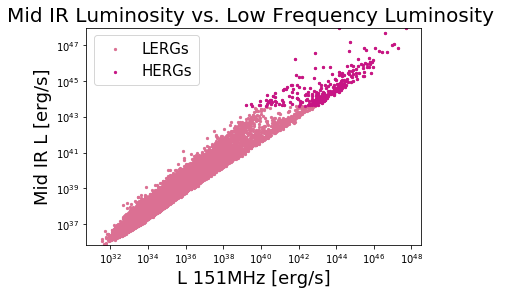

In [10]:
#Limit=[]
#for j in range(len(Pw)):
    #Limit.append(4e43)

    
#logPlot = plt.gca()
#logPlot.loglog(Pw,Limit,'r--',c='black')
plt.scatter(Pw, Pw22,s =5, c='palevioletred',label='LERGs')
plt.scatter(Pw_adj1 ,Pw_adj ,s =5 ,c='mediumvioletred',label='HERGs')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0,1e48)
plt.title('Mid IR Luminosity vs. Low Frequency Luminosity ',fontsize = 20)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('L 151MHz [erg/s]', fontsize = 18)
plt.ylabel('Mid IR L [erg/s]', fontsize = 18)
plt.show()

In [15]:
## Convert erg to J >>> WHz^-1
L_low_f = Pw_adj1*1e-7
L_mid_IR = Pw_adj*1e-7
L_opti = Pw_g_H*1e-7

z_new  = z[:5776,]


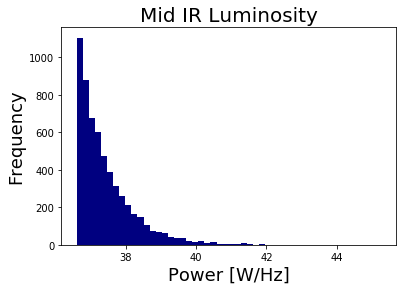

In [16]:
import plotly.plotly as py
plt.hist(np.log10(L_mid_IR), color= "navy", bins = 50)
plt.title("Mid IR Luminosity", fontsize = 20)
plt.xlabel("Power [W/Hz]", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0,1e37)
rwidth=20
fig = plt.gcf()

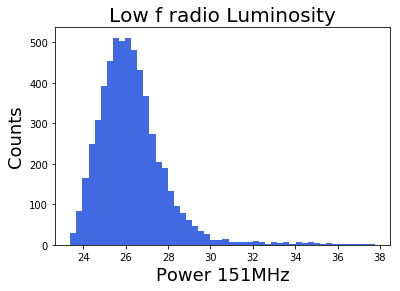

In [17]:
plt.hist(np.log10(L_low_f), facecolor= 'royalblue', bins = 50)
plt.title("Low f radio Luminosity", fontsize = 20)
plt.xlabel("Power 151MHz", fontsize= 18)
plt.ylabel("Counts", fontsize = 18)
#plt.xscale('log')
#plt.xlim(1e34,1e36)
fig = plt.gcf()

In [18]:
#Pw_adj.tolist()

Text(0,0.5,'Power [W$Hz^-1$]')

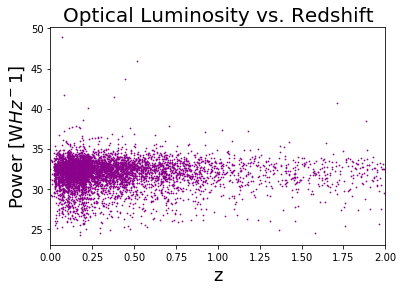

In [19]:
plt.scatter(z_new, np.log10(L_opti), s = 0.5, c='darkmagenta')
#plt.yscale('log')
plt.title('Optical Luminosity vs. Redshift',size=20)
#plt.ylim(0,1e38)
plt.xlim(0,2)
plt.xlabel("z",size=18)
plt.ylabel("Power [W$Hz^-1$]",size=18)

Text(0,0.5,'Power [W$Hz^-1$]')

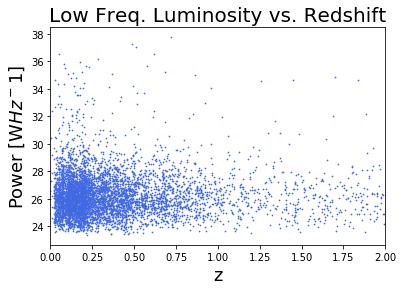

In [20]:
plt.scatter(z_new, np.log10(L_low_f), s = 0.5, c='royalblue')
plt.xlim(0,2)
#plt.ylim(1e21,1e35)
#plt.yscale('log')
plt.title('Low Freq. Luminosity vs. Redshift',size=20)
plt.xlabel("z",size=18)
plt.ylabel("Power [W$Hz^-1$]",size=18)

In [24]:
a  = np.log10(1+z)

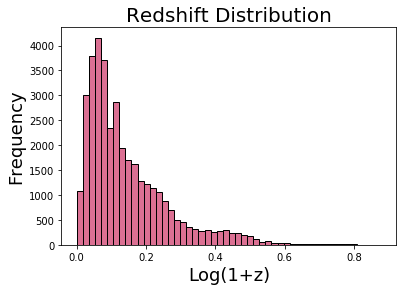

In [43]:
plt.hist(a, color= "palevioletred", bins = 50)
plt.hist(a, color= "navy", bins = 50, fill = False)
plt.title("Redshift Distribution", fontsize = 20)
plt.xlabel("Log(1+z)", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
#plt.xscale('log')
#plt.yscale('log')
rwidth=10
fig = plt.gcf()

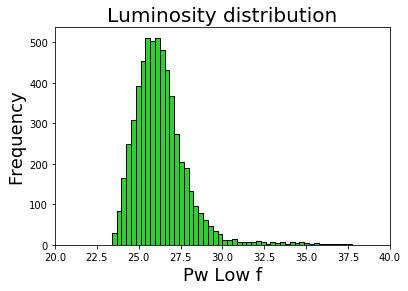

In [181]:
b= np.log10(L_low_f)

plt.hist(b, color= "limegreen", bins = 50)
plt.hist(b, color= "navy", bins = 50, fill = False)
plt.title("Luminosity distribution", fontsize = 20)
plt.xlabel("Pw Low f", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
plt.xlim(20,40)
rwidth=10
fig = plt.gcf()

# Result of Crossmatch

In [27]:
hdul2 = fits.open('crossmatch1.fits')
data = hdul2[1].data
flux = data.field('Total_flux') # Obtain the total flux column 
redshift = data.field('z_best') # Obtain redshift column
flux_22 = data.field('w4Flux') # Obtain 22 microns flux
flux_g = data.field('gFApflux') # Obtain flux for g band

In [30]:
Q_d = array(cosmo.luminosity_distance([flux_g])*3.08567758e24) 
pw_g  = (power(Q_d,flux_g,redshift))
#Quasar_opti_P = Pw_g*1e-7


Lum_D = array(cosmo.luminosity_distance([flux])*3.08567758e24) 
pw = (power(Lum_D,flux,redshift))
#(1+redshift)**(-0.7)

Lum_D22 = array(cosmo.luminosity_distance([flux_22])*3.08567758e24)
pw22 = (power(Lum_D22,flux_22,redshift))

Adj = np.where(pw22>=4e43)

# FIND DATA FOR QUASARS

Quasar_mid_IR = array((pw22[Adj])*1e-7)
Quasar_Low_P = array((pw[Adj])*1e-7) 
Quasar_opti_P = array((pw_g[Adj])*1e-7)

z_QSO = redshift[:432,]


In [34]:
# FIND DATA FOR RADIO GALAXIES


RG_low = (set(L_low_f)-set(Quasar_Low_P))
P_RG_low  = array(list(RG_low))

RG_IR = (set(L_mid_IR)-set(Quasar_mid_IR))
P_RG_IR  = array(list(RG_IR))

RG_opti = (set(L_opti)-set(Quasar_opti_P))
P_RG_opti  = array(list(RG_opti))


z_RG = z[:5344,]

Text(0,0.5,'Power [W$Hz^-1$]')

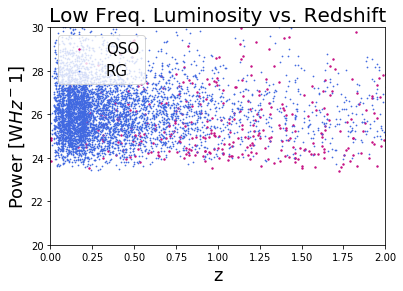

In [205]:
plt.scatter(z_QSO, np.log10(Quasar_Low_P), s = 2, c='mediumvioletred',label = 'QSO')
plt.scatter(z_RG, np.log10(P_RG_low), s = 0.5, c='royalblue', label = 'RG')
plt.xlim(0,2)
plt.ylim(20,30)
#plt.yscale('log')
plt.title('Low Freq. Luminosity vs. Redshift',size=20)
plt.xlabel("z",size=18)
plt.legend(loc=2, prop={'size': 15})
plt.ylabel("Power [W$Hz^-1$]",size=18)

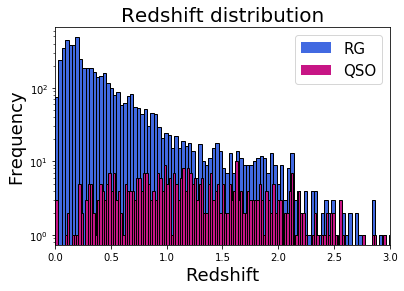

In [42]:
plt.hist(z_RG, color= "royalblue", bins = 200, label='RG')
plt.hist(z_RG, color= "royalblue", bins = 200, fill = False)
plt.hist(z_QSO, color= "mediumvioletred", bins = 200,label='QSO')
plt.hist(z_QSO, color= "royalblue", bins = 200, fill = False)
plt.title("Redshift distribution", fontsize = 20)
plt.yscale('log')
plt.xlabel("Redshift", fontsize= 18)
plt.ylabel("Frequency", fontsize = 18)
rwidth=10
plt.legend(loc=1, prop={'size': 15})
plt.xlim(0,3)
fig = plt.gcf()

# Find Linear Size

In [38]:
# Import desired parameters >>> DC_maj and LGZ size

dc_maj = data.field('DC_maj')
DC_maj = array(dc_maj)
A = data.field('LGZ_size')
LGZ = np.nan_to_num(A)
DC_MAJ = (np.nan_to_num(DC_maj))*2


# Calculate angular distance using python function

ad_QSO = array(cosmo.angular_diameter_distance(z_QSO)) #This is in Kiloparsecs
ad_RG = array(cosmo.angular_diameter_distance(z_RG))



In [45]:
dc_rg = (set(dc_major)-set(DC_maj))
DC_RG1  = array(list(dc_rg))

lgz_rg = (set(lgz)-set(A))
LGZ_RG1  = array(list(lgz_rg))

DC_RG = (np.nan_to_num(DC_RG1))*2   ### Deconvolved size for radio galaxies

LGZ_RG  = np.nan_to_num(LGZ_RG1)    ### LGZ for radio galaxies

In [46]:
## Loop that chooses LGZ instead of DC_maj for Quasars
for i in np.arange(len(DC_MAJ)):
    if (LGZ[i]==0):
        print (DC_MAJ)
    else:
        DC_MAJ[i] = LGZ[i]


[ 0.          0.          0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.         19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ...  0.        

In [47]:
for i in np.arange(len(DC_RG)):
    if (LGZ_RG[i]==0):
        print (DC_RG)
    else:
        DC_RG[i] = LGZ_RG[i]

[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643

In [48]:
def LZ(ang_d,dc):
    linear_size = ang_d*dc*(np.pi/180)
    return linear_size

In [64]:
a = DC_MAJ[DC_MAJ != 0]
a1 = DC_MAJ[:432,]
b = DC_RG[DC_RG != 0]
b1 = DC_RG[:5344,]

L_QSO = array(LZ(ad_QSO,a1))
L_RG = array(LZ(ad_RG,b1))

In [65]:
c1 = L_QSO[:200,]
d1 = L_RG[:200,]


bins_QSO = np.linspace(0, 1.0, num=200)
bins_RG = np.linspace(0,1.0,num = 200)

In [382]:
c1.sort()
d1.sort()

Text(0,0.5,'Fraction of Sources')

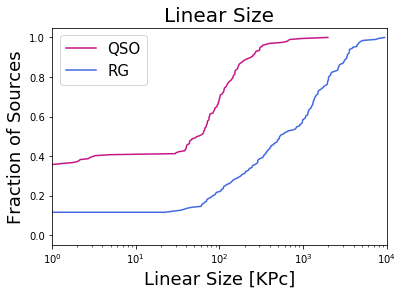

In [488]:

plt.plot(c1,bins_QSO, c = 'mediumvioletred', label = 'QSO')
plt.plot(d1,bins_RG, c='royalblue', label = 'RG')
plt.xscale('log')
plt.xlim(1,1e4)
plt.legend(loc=2, prop={'size': 15})
plt.title('Linear Size', fontsize= 20)
plt.xlabel('Linear Size [KPc]', fontsize =18)
plt.ylabel('Fraction of Sources', fontsize =18)

In [314]:
# Find median value of radio galaxies and quasars
import statistics


m_RG = statistics.median(d1)
m_QSO = statistics.median(c1)

#Find ratio R
R = m_RG/m_QSO

In [160]:
# Create range of Theta C and calculate new ratio

θ_c = np.linspace(0, 90, num=90) ### radians

#Define function to evaluate R

def Num(theta):
    num  = np.sin(np.arccos(np.cos((np.deg2rad(theta/2)))))
    return num

def Denom(theta):
    denom1 = np.sin(np.arccos((1+np.cos(np.deg2rad(theta)))/2))
    return denom1


In [258]:
R_θ = Num(θ_c)/Denom(θ_c)

R_θ_c = np.nan_to_num(R_θ) 

In [259]:
R_θ_c

array([0.        , 0.70712055, 0.70716185, 0.70723068, 0.70732706,
       0.70745097, 0.70760243, 0.70778145, 0.70798802, 0.70822216,
       0.70848388, 0.70877318, 0.70909008, 0.70943458, 0.70980671,
       0.71020647, 0.71063387, 0.71108894, 0.71157169, 0.71208213,
       0.71262028, 0.71318616, 0.71377978, 0.71440116, 0.71505033,
       0.7157273 , 0.71643208, 0.7171647 , 0.71792518, 0.71871353,
       0.71952978, 0.72037394, 0.72124602, 0.72214605, 0.72307405,
       0.72403002, 0.72501399, 0.72602596, 0.72706595, 0.72813398,
       0.72923005, 0.73035417, 0.73150634, 0.73268658, 0.73389488,
       0.73513125, 0.73639568, 0.73768816, 0.7390087 , 0.74035728,
       0.74173388, 0.7431385 , 0.7445711 , 0.74603166, 0.74752016,
       0.74903655, 0.75058081, 0.75215288, 0.75375272, 0.75538028,
       0.75703549, 0.75871828, 0.76042859, 0.76216633, 0.76393141,
       0.76572375, 0.76754324, 0.76938976, 0.7712632 , 0.77316342,
       0.7750903 , 0.77704368, 0.77902341, 0.7810293 , 0.78306

# Bins division for redshift

In [223]:
## Bins >>> 0.25,0.50,0.75,1.00, 1.25, 1.50,1.75,2.00

def binselect(z,x,y):
    select = z[(z >= x) & (z <= y)]
    return select
binselect(z_RG,1.25,2.00).shape

(264,)

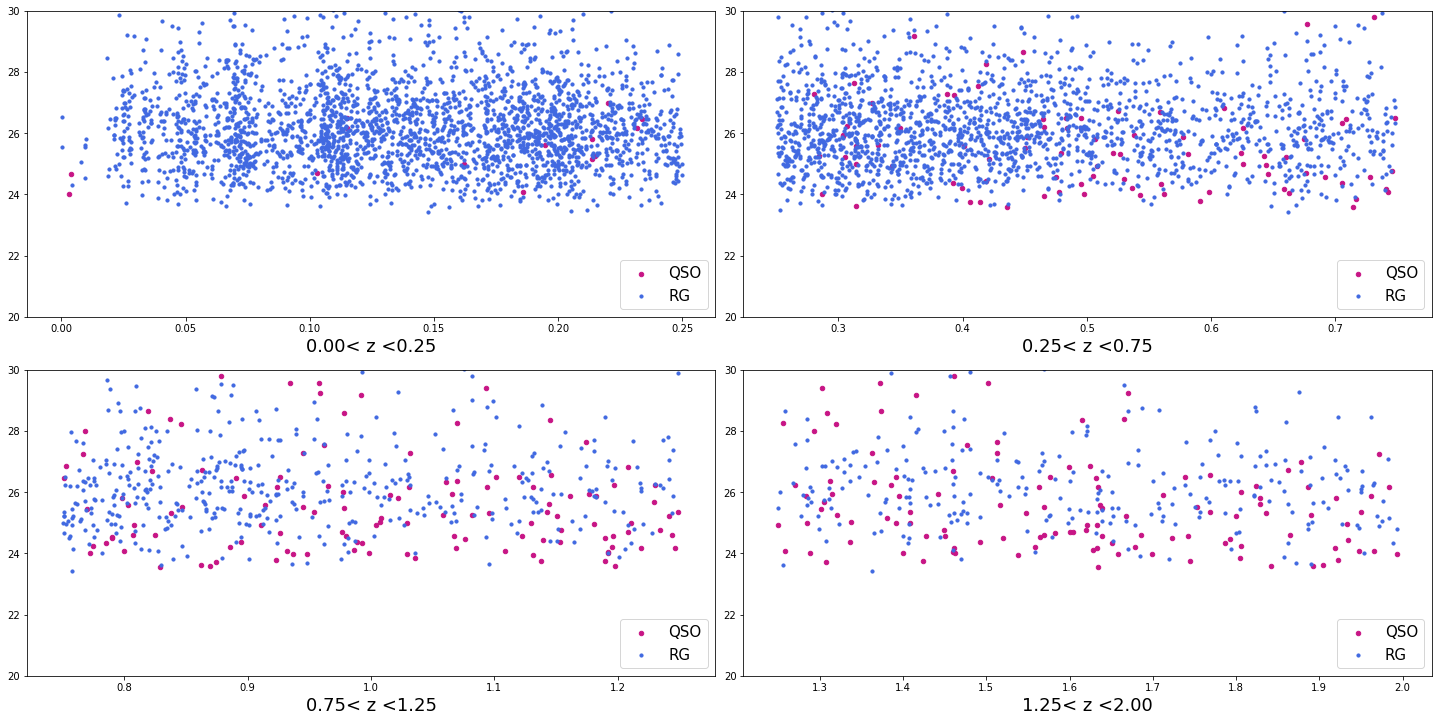

In [313]:

f = plt.figure(figsize=(20,10))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 =  f.add_subplot(223)
ax4 =  f.add_subplot(224)


ax.scatter(binselect(z_QSO,0,0.25), np.log10(Quasar_Low_P[:16,]), s = 20, c='mediumvioletred',label = 'QSO')
ax.scatter(binselect(z_RG,0.0,0.25), np.log10(P_RG_low[:2650,]), s = 10, c='royalblue',label = 'RG')
ax.set_ylim(20,30)
ax.set_xlabel('0.00< z <0.25',fontsize = 18)
ax.legend(loc=4, prop={'size': 15})

ax2.scatter(binselect(z_QSO,0.25,0.75), np.log10(Quasar_Low_P[:91,]), s = 20, c='mediumvioletred',label = 'QSO')
ax2.scatter(binselect(z_RG,0.25,0.75), np.log10(P_RG_low[:1861,]), s = 10, c='royalblue',label = 'RG')
ax2.set_ylim(20,30)
ax2.set_xlabel('0.25< z <0.75',fontsize = 18)
ax2.legend(loc=4, prop={'size': 15})

ax3.scatter(binselect(z_QSO,0.75,1.25), np.log10(Quasar_Low_P[:132,]), s = 20, c='mediumvioletred',label = 'QSO')
ax3.scatter(binselect(z_RG,0.75,1.25), np.log10(P_RG_low[:456,]), s = 10, c='royalblue',label = 'RG')
ax3.set_ylim(20,30)
ax3.set_xlabel('0.75< z <1.25',fontsize = 18)
ax3.legend(loc=4, prop={'size': 15})

ax4.scatter(binselect(z_QSO,1.25,2.00), np.log10(Quasar_Low_P[:131,]), s = 20, c='mediumvioletred',label = 'QSO')
ax4.scatter(binselect(z_RG,1.25,2.00), np.log10(P_RG_low[:264,]), s = 10, c='royalblue',label = 'RG')
ax4.set_ylim(20,30)
ax4.set_xlabel('1.25< z <2.00',fontsize = 18)
ax4.legend(loc=4, prop={'size': 15})

plt.tight_layout(pad=0.6, w_pad=0.5, h_pad=1.0)



# Bins Division for Power

In [341]:
def Binselect(p,q,r):
    Select = p[(p >= q) & (p <= r)]
    return Select
Binselect(Quasar_Low_P,1e23,3e26).shape

(290,)

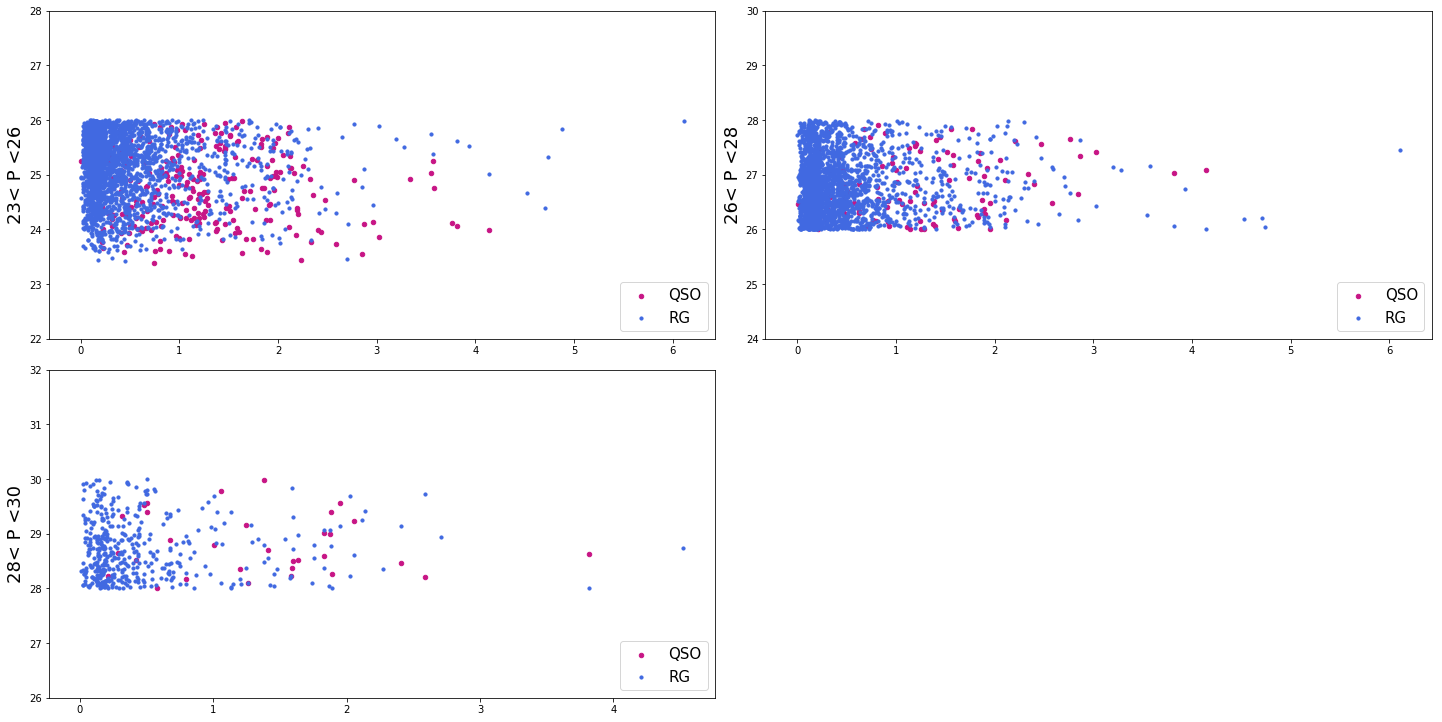

In [344]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax4 =  f.add_subplot(223)


ax.scatter(z_QSO[:254,], np.log10(Binselect(Quasar_Low_P,1e23,1e26)), s = 20, c='mediumvioletred',label = 'QSO')
ax.scatter(z_RG[:2488,], np.log10(Binselect(P_RG_low,1e23,1e26)), s = 10, c='royalblue',label = 'RG')
ax.set_ylim(22,28)
ax.set_ylabel('23< P <26',fontsize = 18)
ax.legend(loc=4, prop={'size': 15})

ax2.scatter(z_QSO[:106,], np.log10(Binselect(Quasar_Low_P,1e26,1e28)), s = 20, c='mediumvioletred',label = 'QSO')
ax2.scatter(z_RG[:2313,], np.log10(Binselect(P_RG_low,1e26,1e28)), s = 10, c='royalblue',label = 'RG')
ax2.set_ylim(24,30)
ax2.set_ylabel('26< P <28',fontsize = 18)
ax2.legend(loc=4, prop={'size': 15})


ax4.scatter(z_QSO[:31,], np.log10(Binselect(Quasar_Low_P,1e28,1e30)), s = 20, c='mediumvioletred',label = 'QSO')
ax4.scatter(z_RG[:442,], np.log10(Binselect(P_RG_low,1e28,1e30)), s = 10, c='royalblue',label = 'RG')
ax4.set_ylim(26,32)
ax4.set_ylabel('28< P <30',fontsize = 18)
ax4.legend(loc=4, prop={'size': 15})

plt.tight_layout(pad=0.6, w_pad=0.5, h_pad=1.0)



In [ ]:
P